In [1]:
from adjustable_efficient_diagonal import *
from qiskit.tools.visualization import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

Implementation of a diagonal unitary $\hat{U}_f=\sum_x e^{if(x)}|x><x|$ with $f(x)=\sin(2\pi x)$

In [2]:
def f(x):
    return np.sin(2*np.pi*x)

def get_max_coeffs(n,n_operators,f):
    walsh_coeffs = {}
    for i in range(2**n):
        walsh_coeffs[i] = abs(walsh_coeff(i,f,2**n))
    w = sorted(walsh_coeffs.items(), key=lambda x:x[1],reverse=True)
    list_operator_to_implement = list(dict(w).keys())[:n_operators]
    return list_operator_to_implement

n = 3
n_ancilla = 0
gray_code = True

# Number of operator to implement, max value is 2**n
n_operators = 2**n
# We implement the operators with the highest coefficients
list_operator_to_implement = get_max_coeffs(n,n_operators,f)

# Walsh circuit
q_walsh = QuantumRegister(n,name='q_walsh')
a_walsh = AncillaRegister(n_ancilla,name='a_walsh')
qc_walsh = QuantumCircuit(q_walsh,a_walsh)

# Sequential circuit
q_sequential = QuantumRegister(n,name='q_sequential')
a_sequential = AncillaRegister(n_ancilla,name='a_sequential')
qc_sequential = QuantumCircuit(q_sequential,a_sequential)

qc_walsh.h(q_walsh)
qc_sequential.h(q_sequential)

diagonal_walsh = diagonal(n,f,n_ancilla,list_operator_to_implement,decomposition='walsh',gray_code=gray_code,swaps=True)
diagonal_sequential = diagonal(n,f,n_ancilla,list_operator_to_implement,decomposition='sequential',gray_code=gray_code,swaps=False)

qc_walsh.append(diagonal_walsh,qc_walsh.qubits)
qc_sequential.append(diagonal_sequential,qc_sequential.qubits)

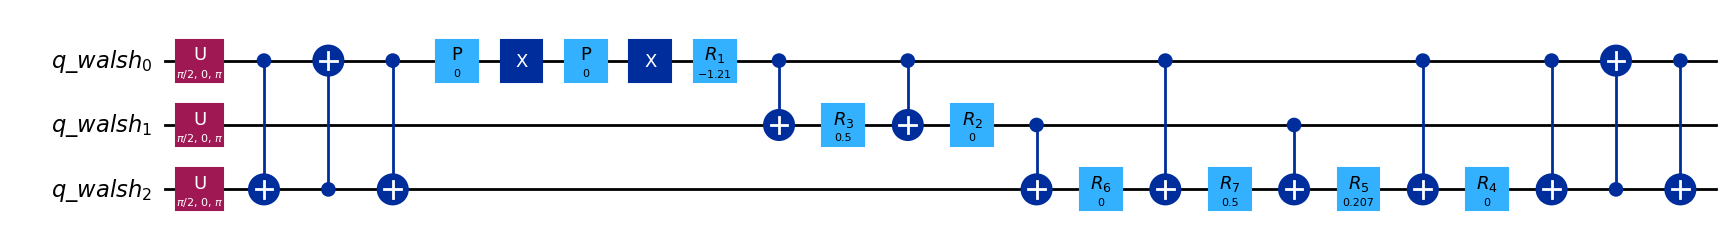

In [3]:
qc_walsh.decompose(reps=3).draw('mpl',style='iqx')

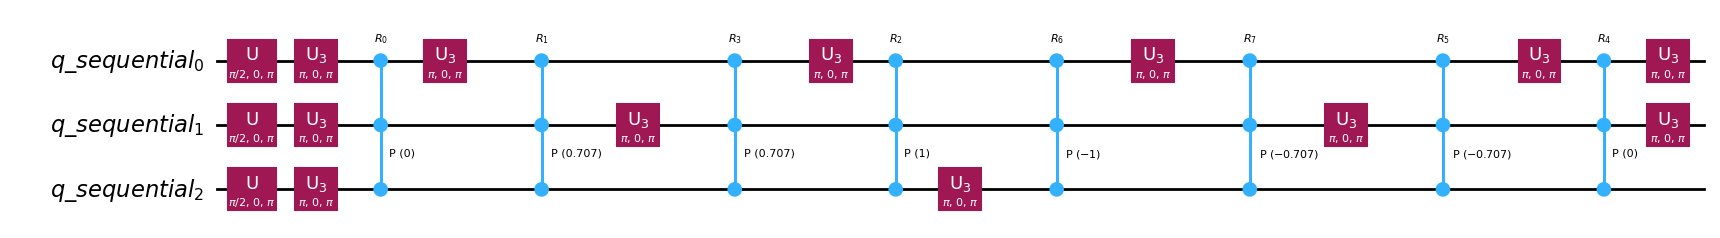

In [4]:
qc_sequential.decompose(reps=3).draw('mpl',style='iqx')

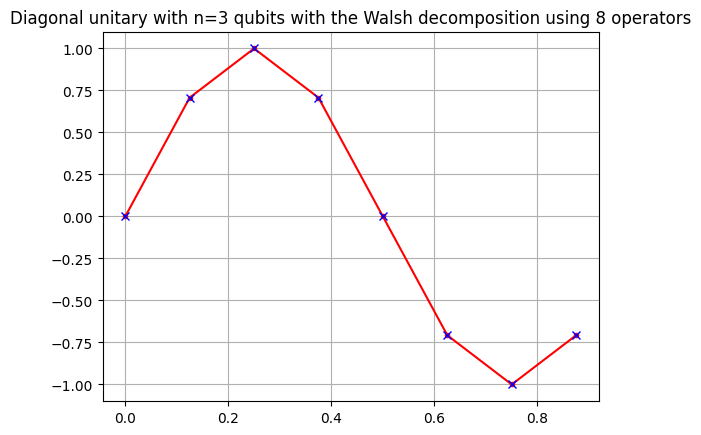

In [7]:
state = qi.Statevector.from_instruction(qc_walsh)
L = np.array(state.data[0:2**n])
L2 = np.angle(L)
X = np.array(range(2**n))/2**n
plt.plot(X,L2,marker='.',c='r')
plt.plot(X,f(X),marker='x',c='b',linestyle='')
plt.title('Diagonal unitary with n='+str(n)+' qubits with the Walsh decomposition using '+str(n_operators)+' operators')
plt.grid()
plt.show()

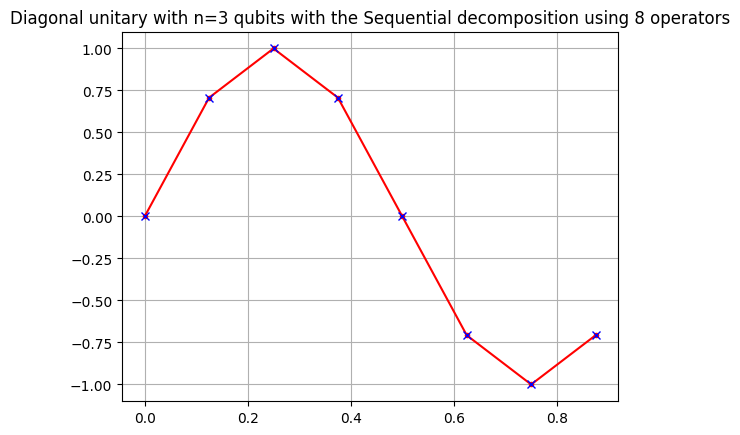

In [8]:
state = qi.Statevector.from_instruction(qc_sequential)
L = np.array(state.data[0:2**n])
L2 = np.angle(L)
X = np.array(range(2**n))/2**n
plt.plot(X,L2,marker='.',c='r')
plt.plot(X,f(X),marker='x',c='b',linestyle='')
plt.title('Diagonal unitary with n='+str(n)+' qubits with the Sequential decomposition using '+str(n_operators)+' operators')
plt.grid()
plt.show()